#Logistic Regression Playground: Customer Leads

In this notebook, we will:
1. Load and inspect the leads dataset.
2. Explore the data and perform basic EDA.
3. Preprocess the data: handle missing values, encode categorical variables.
4. Split the data into training and testing sets.
5. Train a logistic regression model to predict the "Converted" target.
6. Evaluate the model's performance.
7. Experiment with feature selection, sampling, and encoding options.

Dataset: https://www.kaggle.com/datasets/ashydv/leads-dataset/data?select=Leads.csv
Target Variable: Converted

Feel free to adjust the cells and experiment with different choices to see how your model performance changes.

## Step 1: Import necessary libraries and dataset.

In [ ]:
import kagglehub
import pandas as pd
import os

# Download Leads.csv from ashydv/leads-dataset on Kaggle
path = kagglehub.dataset_download("ashydv/leads-dataset")
file_path = os.path.join(path, 'Leads.csv')
df = pd.read_csv(file_path)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Step 2: Exploratory Data Analysis (EDA)
Take a look at the distribution of the target variable and any interesting features. You can add more visualizations as needed.

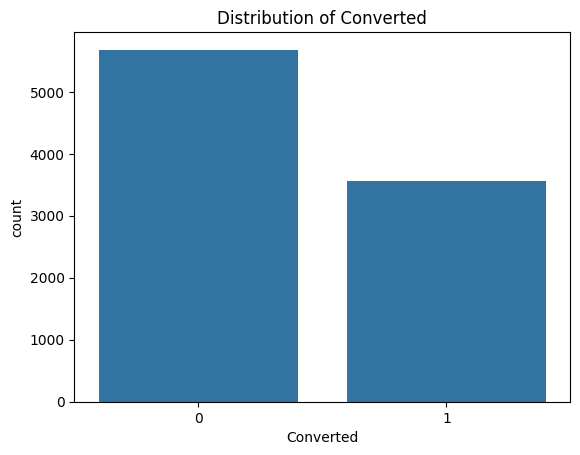

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# use sns.countplot to view the distribution of the Converted target variable
sns.countplot(x='Converted', data=df)
plt.title('Distribution of Converted')
plt.show()

## Step 3: Data Preprocessing
In this step, we:

- Feature Selection: Pick the predictors you want to use. (Feel free to change these!)
- Handle Missing Values: Decide whether to drop or impute missing data.
- Encode Categorical Variables: Convert non-numeric data into numeric format.

In [ ]:
# 3.0 View All Column Names
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [ ]:
# 3.1 Feature Selection
# Choose predictor variables
feature_vars_target = ["Converted", "Lead Source", "Do Not Email", "Do Not Call", "TotalVisits", "Total Time Spent on Website"] # make sure to keep Converted
df_select = df[feature_vars_target]

# 3.2 Handling Missing Values
df_drop = df_select.dropna(subset = feature_vars_target) # select column(s) to drop NAs
print("\nAfter dropping missing values, dataset shape:", df_drop.shape)

# 3.3 Encode Categorical Variables
df_clean = pd.get_dummies(df_drop, drop_first = True)
df_clean.head()


After dropping missing values, dataset shape: (9074, 6)


,Converted,TotalVisits,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,...,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes
0,0,0.0,0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,0,5.0,674,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,1,2.0,1532,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,1.0,305,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,2.0,1428,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Step 4: Splitting the Data
We split the dataset into training and testing sets.

- Try looking up the stratify parameter in [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [ ]:
from sklearn.model_selection import train_test_split

# Sample for balanced classes
#df_clean = df_clean.groupby('Converted', group_keys = False).apply(lambda x: x.sample(2000, replace = True))

# Create X and y
X = df_clean.drop(columns = 'Converted')
y = df_clean["Converted"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape

<ipython-input-108-a56440be6870>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_clean = df_clean.groupby('Converted', group_keys = False).apply(lambda x: x.sample(2000, replace = True))


(3200, 24)

## Step 5: Training the Logistic Regression Model
We now build and train the logistic regression model using the training data.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the logistic regression model
# Increasing max_iter to ensure convergence.
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Step 6: Model Evaluation
We evaluate our model using accuracy, confusion matrix, and classification report.

Accuracy: 0.86


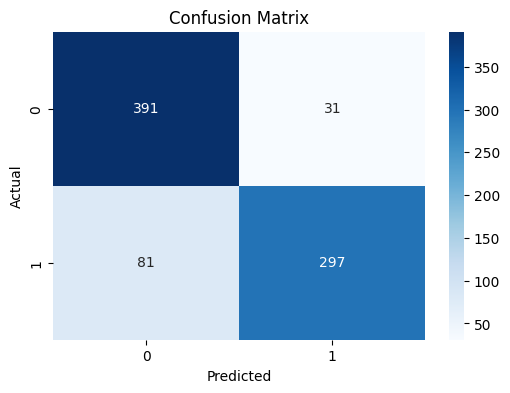

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.87       422
           1       0.91      0.79      0.84       378

    accuracy                           0.86       800
   macro avg       0.87      0.86      0.86       800
weighted avg       0.86      0.86      0.86       800



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate and plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

## Step 7: Model Interpretation
Examine the coefficients to understand the impact of each feature.

In [ ]:
# Extract coefficients and display them
coef = pd.Series(model.coef_[0], index=X.columns)
print("Model Coefficients:")
print(coef.sort_values(ascending=False))

Model Coefficients:
Lead Source_Reference            4.698227
Lead Source_Welingak Website     2.097064
TotalVisits                      0.057911
Total Time Spent on Website      0.003633
Lead Source_Pay per Click Ads    0.000000
Lead Source_Press_Release        0.000000
Lead Source_NC_EDM               0.000000
Lead Source_Live Chat            0.000000
Lead Source_welearnblog_Home     0.000000
Lead Source_youtubechannel       0.000000
Lead Source_google               0.000000
Lead Source_testone              0.000000
Lead Source_WeLearn              0.000000
Lead Source_Social Media         0.000000
Lead Source_blog                 0.000000
Lead Source_bing                 0.000000
Do Not Call_Yes                  0.000000
Lead Source_Olark Chat          -0.291735
Lead Source_Facebook            -0.596573
Lead Source_Referral Sites      -0.803938
Lead Source_Google              -1.262675
Do Not Email_Yes                -1.885745
Lead Source_Direct Traffic      -2.091496
Lead Source_Or